In [2]:
import numpy as np
import scipy as sp
from minepy import MINE
import pandas as pd

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, ward

In [3]:
d_path =  "../catalog_data/d1_soku.csv"
feature_col = [
    "coat", "D", "Rc", "l", "lu", "DN", "Lf", "Ds",
    "z", "Theta", "HRC"
]
df = pd.read_csv(d_path)
df = df[feature_col].values

In [ ]:
def calc_mic(a, b):
    """
    Calculate MIC between Vector A and B
    """
    mine = MINE()
    mine.compute_score(a, b)
    return (2 - mine.mic()) ** 0.5

In [25]:
#c = 0
dists = []
for i in range(df.shape[1]):
    for j in range(i+1, df.shape[1]):
        #print(pdist(df[:, [i, j]].T))
        #print(dist[c])
        #c+= 1
        dists.append(calc_mic(df[:, i], df[:, j]))
dists = np.array(dists)

<ipython-input-22-ae6ef9ebb8dd>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(a, b)


In [28]:
Z = ward(dists)

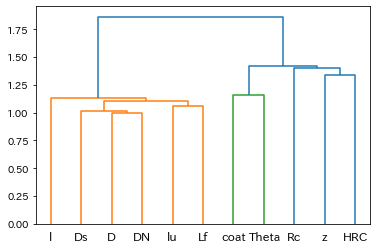

In [29]:
d = dendrogram(Z, labels=feature_col)